## Pandas. Загрузка библиотек

*Разбор данного раздела:* https://youtu.be/LVkg0nx--0k?t=2234

 -  <a href="http://pandas.pydata.org/">Pandas</a> - библиотека для обработки и анализа данных. Предназначена для данных разной природы - матричных, панельных данных, временных рядов. Претендует на звание самого мощного и гибкого средства для анализа данных с открытым исходным кодом.

In [0]:
import pandas as pd

В пандас есть две структуры данных:
- Series: одномерный массив с именованными индексами (чаще всего, данные одного типа)
- DataFrame: двухмерный массив, имеет табличную структуру, легко изменяется по размерам, может содержать в себе данные разных типов

Оба типа можно создавать вручную с помощью функций из самой библиотеки:
- pandas.Series(data=None, index=None, dtype=None)
- pandas.DataFrame(data=None, index=None, columns=None, dtype=None)

- **data** - данные, которые надо записать в структуру
- **index** - индексы строк
- **columns** - названия столбцов
- **dtype** - тип данных

Кроме data, остальные параметры опциональны


Мы, конечно, можем сами создавать датафреймы!

Например, кто-то нашел нам кусок данных и просит воспроизвести этот датасет:

<img src="https://i.imgur.com/FUCGiKP.png">

Давайте разберемся, что здесь, что и запишем в известную нам конструкцию - листы. 

In [0]:
columns = ['country', 'province', 'region_1', 'region_2']
index = [0, 1, 10, 100]
data = [['Italy', 'Sicily & Sardinia', 'Etna', 'NaN'], 
        ['Portugal', 'Douro', 'NaN', 'NaN'],
       ['US', 'California', 'Napa Valley', 'Napa'],
       ['US', 'New York', 'Finger Lakes', 'Finger Lakes']]

А теперь соберем в датафрейм

In [0]:
df = pd.DataFrame(data, columns = columns, index = index)
df

,country,province,region_1,region_2
0,Italy,Sicily & Sardinia,Etna,NaN
1,Portugal,Douro,NaN,NaN
10,US,California,Napa Valley,Napa
100,US,New York,Finger Lakes,Finger Lakes


### Загрузка и запись данных

*Разбор данного раздела:* https://youtu.be/LVkg0nx--0k?t=2560

Правда в том, что мы не будем так жестоко к себе и вручную вбивать данные не будем. А будем загружать из файла. 


- Функции типа **pd.read_формат** и **pd.to_формат**
считывают и записывают данные соответственно. <br /> Полный список можно найти в документации:
https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html

Научимся считывать данные в формате csv (comma separated value) функцией:

- <a href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html#pandas.read_csv"> pd.read_csv()</a>: 

Аргументов у нее очень много, критически важные:
 - **filepath_or_buffer** - текстовая строка с названием (адресом) файла
 - **sep** - разделитель между данными
 - **header** - номер строки, в которой в файле указаны названия столбцов, None, если нет
 - **names** - список с названиями колонок
 - **index_col** - или номер столбца, или список,  или ничего - колонка, из которой надо взять названия строк


In [0]:
from google.colab import files

In [0]:
files.upload()
!ls

Saving dpo_1-2_winemag-data_first150k_1.csv to dpo_1-2_winemag-data_first150k_1.csv
dpo_1-2_winemag-data_first150k_1.csv  sample_data


In [0]:
data = pd.read_csv('dpo_1-2_winemag-data_first150k_1.csv')


### Смотрим, что загрузилось

*Разбор данного раздела:* https://youtu.be/LVkg0nx--0k?t=2834

In [0]:
data.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


Что-то не то с первым столбцом, немного поправим

In [0]:
data = pd.read_csv('dpo_1-2_winemag-data_first150k_1.csv', index_col = 0)

In [0]:
data.head(20)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos
7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm


### Смотрим, что загрузилось:

- Посчитаем, сколько записей
- Посмотрим, какого типа данные
- Проверим, есть ли пропуски

Посчитаем, сколько записей в данных.

*Разбор данного раздела:* https://youtu.be/LVkg0nx--0k?t=3010

- Помогает метод **count()**. Это значит, что к любому датафрейму стучимся в гости с этим методом:

In [0]:
data.count()

country        150925
description    150930
designation    105195
points         150930
price          137235
province       150925
region_1       125870
region_2        60953
variety        150930
winery         150930
dtype: int64

In [0]:
data.head(100).count()

country        100
description    100
designation     84
points         100
price           96
province       100
region_1        92
region_2        43
variety        100
winery         100
dtype: int64

In [0]:
data.shape

(150930, 10)

In [0]:
data.size

1509300

- Метод info() заодно показывает, какого типа данные в столбцах

*Разбор данного раздела:* https://youtu.be/LVkg0nx--0k?t=3197

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150930 entries, 0 to 150929
Data columns (total 10 columns):
country        150925 non-null object
description    150930 non-null object
designation    105195 non-null object
points         150930 non-null int64
price          137235 non-null float64
province       150925 non-null object
region_1       125870 non-null object
region_2       60953 non-null object
variety        150930 non-null object
winery         150930 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 12.7+ MB


In [0]:
data.dtypes

country         object
description     object
designation     object
points           int64
price          float64
province        object
region_1        object
region_2        object
variety         object
winery          object
dtype: object

Начнем проверять на пропуски! 

*Разбор данного раздела:* https://youtu.be/LVkg0nx--0k?t=3327

- .isnull() - выдает табличку, где False - ячейка заполнена, True - ячейка пуста :( Ближайшая родня - isna()

In [0]:
data.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [0]:
data.isna().head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False


In [0]:
data.isna().sum()

country            5
description        0
designation    45735
points             0
price          13695
province           5
region_1       25060
region_2       89977
variety            0
winery             0
dtype: int64

In [0]:
data.head(100).isna().sum()

country         0
description     0
designation    16
points          0
price           4
province        0
region_1        8
region_2       57
variety         0
winery          0
dtype: int64

In [0]:
data.isna().head(100).sum()

country         0
description     0
designation    16
points          0
price           4
province        0
region_1        8
region_2       57
variety         0
winery          0
dtype: int64

In [0]:
import numpy as np
np.round(data.isna().sum() / data.shape[0], 2)

country        0.00
description    0.00
designation    0.30
points         0.00
price          0.09
province       0.00
region_1       0.17
region_2       0.60
variety        0.00
winery         0.00
dtype: float64

In [0]:
data.isna().sum().sum()

174477

In [0]:
proc = data.isna().sum().sum() / data.size
print(round(100*proc,1), '%', sep='')

11.6%


Немного опережу события и покажу, как оценить масштаб бедствия визуально. 

*Разбор данного раздела:* https://youtu.be/LVkg0nx--0k?t=3867

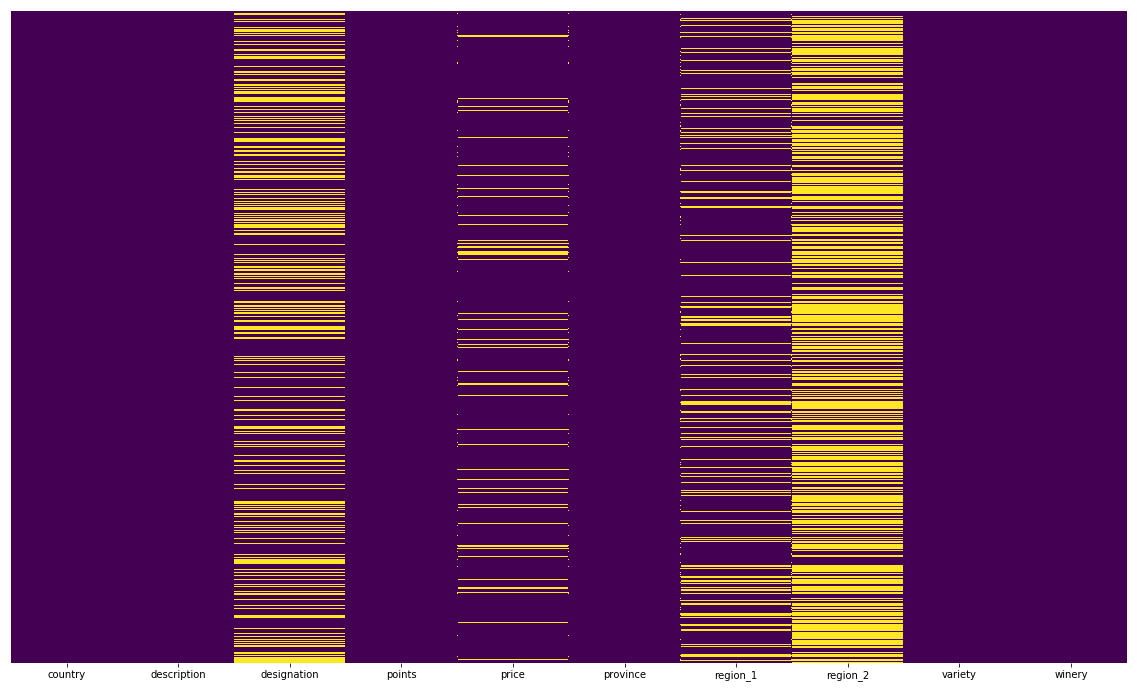

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig, ax = plt.subplots(figsize=(20,12))
sns_heatmap = sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

Что с ним делать?

Выбора не очень много: <br>

1) Удалять: 
- dropna(axis=0, how='any'): axis = 0 - удаляем построчно, axis = 1 выкидываем столбец; how ='any' - выкидываем, если есть хотя бы одна ячейка пустая. how = 'all' - выкидываем, если есть полностью пустая строка или столбец

2) Вставлять информацию самим:
- fillna() - это отдельное искусство, как заполнять. 


Пока не будем трогать данные. 

In [0]:
data.fillna("Python").head(10)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110,Northern Spain,Toro,Python,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66,Provence,Bandol,Python,Provence red blend,Domaine de la Bégude
5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73,Northern Spain,Toro,Python,Tinta de Toro,Numanthia
6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65,Northern Spain,Toro,Python,Tinta de Toro,Maurodos
7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110,Northern Spain,Toro,Python,Tinta de Toro,Bodega Carmen Rodríguez
8,US,This re-named vineyard was formerly bottled as...,Silice,95,65,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm


### Описательные статистики

*Разбор данного раздела:* https://youtu.be/LVkg0nx--0k?t=5161

Теперь посмотрим, а что содержательно у нас есть на руках. 

Глазами просматривать не будем, а попросим посчитать основные описательные статистики. Причем сразу все :) 

- describe() - метод, который возвращает табличку с описательными статистиками. В таком виде считает все для числовых столбцов

In [0]:
data.describe()

,points,price
count,150930.000000,137235.000000
mean,87.888418,33.131482
std,3.222392,36.322536
min,80.000000,4.000000
25%,86.000000,16.000000
50%,88.000000,24.000000
75%,90.000000,40.000000
max,100.000000,2300.000000


Немножко магии, и для нечисловых данные тоже будут свои описательные статистики. 

In [0]:
data.describe(include=['O'])

,country,description,designation,province,region_1,region_2,variety,winery
count,150925,150930,105195,150925,125870,60953,150930,150930
unique,48,97821,30621,455,1236,18,632,14810
top,US,"86-88 This could work as a rich wine, because ...",Reserve,California,Napa Valley,Central Coast,Chardonnay,Williams Selyem
freq,62397,6,2752,44508,6209,13057,14482,374


### Срезы данных

*Разбор данного раздела:* https://youtu.be/LVkg0nx--0k?t=5445

Допустим, нам не нужен датасет, а только определенные столбцы или строки или столбцы и строки. 


Как делать?
Помним, что:
- у столбцов есть названия
- у строк есть названия
- если нет названий, то они пронумерованы с нуля

Основываясь на этой идее, мы начнем отбирать данные.

In [0]:
data.head(1)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz


#### Отбираем по столбцам. Версия 1. 

In [0]:
data['price'].head()

0    235.0
1    110.0
2     90.0
3     65.0
4     66.0
Name: price, dtype: float64

In [0]:
data.price.head()

0    235.0
1    110.0
2     90.0
3     65.0
4     66.0
Name: price, dtype: float64

In [0]:
data[['price','country']].head()

,price,country
0,235.0,US
1,110.0,Spain
2,90.0,US
3,65.0,US
4,66.0,France


#### Отбираем по  строкам. Версия 1. 

Были бы названия - вместо цифр подставили бы названия и все вышло бы также :)

In [0]:
data[10:20]

,country,description,designation,points,price,province,region_1,region_2,variety,winery
10,Italy,"Elegance, complexity and structure come togeth...",Ronco della Chiesa,95,80.0,Northeastern Italy,Collio,NaN,Friulano,Borgo del Tiglio
11,US,"From 18-year-old vines, this supple well-balan...",Estate Vineyard Wadensvil Block,95,48.0,Oregon,Ribbon Ridge,Willamette Valley,Pinot Noir,Patricia Green Cellars
12,US,A standout even in this terrific lineup of 201...,Weber Vineyard,95,48.0,Oregon,Dundee Hills,Willamette Valley,Pinot Noir,Patricia Green Cellars
13,France,This wine is in peak condition. The tannins an...,Château Montus Prestige,95,90.0,Southwest France,Madiran,NaN,Tannat,Vignobles Brumont
14,US,"With its sophisticated mix of mineral, acid an...",Grace Vineyard,95,185.0,Oregon,Dundee Hills,Willamette Valley,Pinot Noir,Domaine Serene
15,US,"First made in 2006, this succulent luscious Ch...",Sigrid,95,90.0,Oregon,Willamette Valley,Willamette Valley,Chardonnay,Bergström
16,US,"This blockbuster, powerhouse of a wine suggest...",Rainin Vineyard,95,325.0,California,Diamond Mountain District,Napa,Cabernet Sauvignon,Hall
17,Spain,"Nicely oaked blackberry, licorice, vanilla and...",6 Años Reserva Premium,95,80.0,Northern Spain,Ribera del Duero,NaN,Tempranillo,Valduero
18,France,Coming from a seven-acre vineyard named after ...,Le Pigeonnier,95,290.0,Southwest France,Cahors,NaN,Malbec,Château Lagrézette
19,US,This fresh and lively medium-bodied wine is be...,Gap's Crown Vineyard,95,75.0,California,Sonoma Coast,Sonoma,Pinot Noir,Gary Farrell


In [0]:
data[10:20:2]

,country,description,designation,points,price,province,region_1,region_2,variety,winery
10,Italy,"Elegance, complexity and structure come togeth...",Ronco della Chiesa,95,80.0,Northeastern Italy,Collio,NaN,Friulano,Borgo del Tiglio
12,US,A standout even in this terrific lineup of 201...,Weber Vineyard,95,48.0,Oregon,Dundee Hills,Willamette Valley,Pinot Noir,Patricia Green Cellars
14,US,"With its sophisticated mix of mineral, acid an...",Grace Vineyard,95,185.0,Oregon,Dundee Hills,Willamette Valley,Pinot Noir,Domaine Serene
16,US,"This blockbuster, powerhouse of a wine suggest...",Rainin Vineyard,95,325.0,California,Diamond Mountain District,Napa,Cabernet Sauvignon,Hall
18,France,Coming from a seven-acre vineyard named after ...,Le Pigeonnier,95,290.0,Southwest France,Cahors,NaN,Malbec,Château Lagrézette


In [0]:
data[::5].head(10)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
10,Italy,"Elegance, complexity and structure come togeth...",Ronco della Chiesa,95,80.0,Northeastern Italy,Collio,NaN,Friulano,Borgo del Tiglio
15,US,"First made in 2006, this succulent luscious Ch...",Sigrid,95,90.0,Oregon,Willamette Valley,Willamette Valley,Chardonnay,Bergström
20,US,Heitz has made this stellar rosé from the rare...,Grignolino,95,24.0,California,Napa Valley,Napa,Rosé,Heitz
25,New Zealand,"Yields were down in 2015, but intensity is up,...",Maté's Vineyard,94,57.0,Kumeu,NaN,NaN,Chardonnay,Kumeu River
30,Bulgaria,This Bulgarian Mavrud presents the nose with s...,Bergulé,90,15.0,Bulgaria,NaN,NaN,Mavrud,Villa Melnik
35,Italy,"Forest floor, tilled soil, mature berry and a ...",Riserva,90,135.0,Tuscany,Brunello di Montalcino,NaN,Sangiovese,Carillon
40,Spain,Earthy plum and cherry aromas score points for...,Amandi,90,17.0,Galicia,Ribeira Sacra,NaN,Mencía,Don Bernardino
45,Italy,"A blend of 90% Sangiovese and 10% Canaiolo, th...",Vigneto Odoardo Beccari Riserva,90,30.0,Tuscany,Chianti Classico,NaN,Red Blend,Vignavecchia


#### Отбор по столбцам. Версия 2. Все еще по названиям 

In [0]:
data.loc[4:7, ['price', 'points']]

,price,points
4,66.0,95
5,73.0,95
6,65.0,95
7,110.0,95


#### Отбор по  строкам. Версия 2. Все еще по названиям 

In [0]:
data.loc[:5,:]

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia


#### Отбор по строчкам и столбцам

In [0]:
data.loc[0:5,['price', 'country']]

,price,country
0,235.0,US
1,110.0,Spain
2,90.0,US
3,65.0,US
4,66.0,France
5,73.0,Spain


#### Отбор по строчкам и столбцам. Версия 3. По номеру строк и столбцов

In [0]:
data.iloc[::5, [1,3]].head()

,description,points
0,This tremendous 100% varietal wine hails from ...,96
5,"Deep, dense and pure from the opening bell, th...",95
10,"Elegance, complexity and structure come togeth...",95
15,"First made in 2006, this succulent luscious Ch...",95
20,Heitz has made this stellar rosé from the rare...,95


#### Отбор с условиями

Так, а если мне нужны вина дороже $15 долларов? Как быть?

In [0]:
#задаем маску
mask = data['price'] > 300

In [0]:
mask.head()

0    False
1    False
2    False
3    False
4    False
Name: price, dtype: bool

In [0]:
#и отбираем данные

temp = data[mask]
temp.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
16,US,"This blockbuster, powerhouse of a wine suggest...",Rainin Vineyard,95,325.0,California,Diamond Mountain District,Napa,Cabernet Sauvignon,Hall
898,Italy,"Aromas of crushed plum, asphalt, oak, toast, e...",Sorì Tildin,92,500.0,Piedmont,Langhe,NaN,Red Blend,Gaja
2145,France,"Full of ripe fruit, opulent and concentrated, ...",NaN,100,848.0,Bordeaux,Pessac-Léognan,NaN,Bordeaux-style White Blend,Château Haut-Brion
2155,France,There is a sense of pure juicy black-currant f...,NaN,97,450.0,Bordeaux,Margaux,NaN,Bordeaux-style Red Blend,Château Margaux
2159,France,"With seriously dense tannins, this shows great...",NaN,97,330.0,Bordeaux,Pessac-Léognan,NaN,Bordeaux-style Red Blend,Château Haut-Brion


In [0]:
data[data.price>300].head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
16,US,"This blockbuster, powerhouse of a wine suggest...",Rainin Vineyard,95,325.0,California,Diamond Mountain District,Napa,Cabernet Sauvignon,Hall
898,Italy,"Aromas of crushed plum, asphalt, oak, toast, e...",Sorì Tildin,92,500.0,Piedmont,Langhe,NaN,Red Blend,Gaja
2145,France,"Full of ripe fruit, opulent and concentrated, ...",NaN,100,848.0,Bordeaux,Pessac-Léognan,NaN,Bordeaux-style White Blend,Château Haut-Brion
2155,France,There is a sense of pure juicy black-currant f...,NaN,97,450.0,Bordeaux,Margaux,NaN,Bordeaux-style Red Blend,Château Margaux
2159,France,"With seriously dense tannins, this shows great...",NaN,97,330.0,Bordeaux,Pessac-Léognan,NaN,Bordeaux-style Red Blend,Château Haut-Brion


In [0]:
data[(data.price > 200) & ((data.country == 'US') | (data.country == 'France'))].head(15)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
16,US,"This blockbuster, powerhouse of a wine suggest...",Rainin Vineyard,95,325.0,California,Diamond Mountain District,Napa,Cabernet Sauvignon,Hall
18,France,Coming from a seven-acre vineyard named after ...,Le Pigeonnier,95,290.0,Southwest France,Cahors,NaN,Malbec,Château Lagrézette
2145,France,"Full of ripe fruit, opulent and concentrated, ...",NaN,100,848.0,Bordeaux,Pessac-Léognan,NaN,Bordeaux-style White Blend,Château Haut-Brion
2155,France,There is a sense of pure juicy black-currant f...,NaN,97,450.0,Bordeaux,Margaux,NaN,Bordeaux-style Red Blend,Château Margaux
2159,France,"With seriously dense tannins, this shows great...",NaN,97,330.0,Bordeaux,Pessac-Léognan,NaN,Bordeaux-style Red Blend,Château Haut-Brion
2434,France,"With 83% Sémillon in the blend, this wine has ...",NaN,97,698.0,Bordeaux,Pessac-Léognan,NaN,Bordeaux-style White Blend,Château La Mission Haut-Brion
2673,France,"As with Clos de Vougeot in red, every producer...",NaN,90,238.0,Burgundy,Corton-Charlemagne,NaN,Chardonnay,Jean-Luc and Paul Aegerter
2733,France,"Richly endowed, the wine is beautifully concen...",NaN,95,202.0,Bordeaux,Pessac-Léognan,NaN,Bordeaux-style Red Blend,Château La Mission Haut-Brion
2742,France,This is a powerfully structured wine from a 18...,NaN,95,250.0,Bordeaux,Pomerol,NaN,Bordeaux-style Red Blend,Château Trotanoy


### Мультииндексация

*Разбор данного раздела:* https://youtu.be/LVkg0nx--0k?t=6039

In [0]:
data.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [0]:
data_ = data.groupby(['country', 'points']).count()
data_.head(50)

description  designation  price  ...  region_2  variety  winery
country   points                                   ...                           
Albania   88                2            0      2  ...         0        2       2
Argentina 80              153          102    152  ...         0      153     153
          81              224          139    224  ...         0      224     224
          82              307          169    300  ...         0      307     307
          83              595          337    585  ...         0      595     595
          84              636          380    633  ...         0      636     636
          85              671          437    665  ...         0      671     671
          86              678          469    677  ...         0      678     678
          87              700          502    693  ...         0      700     700
          88              523          396    519  ...         0      523     523
          89              348          295    348  ...         0      348     348
          90              304          250    304  ...         0      304     304
          91              200          189    199  ...         0      200     200
          92              163          150    163  ...         0      163     163
          93               77           72     73  ...         0       77      77
          94               32           29     32  ...         0       32      32
          95               10           10     10  ...         0       10      10
          96                7            7      7  ...         0        7       7
          97                3            3      3  ...         0        3       3
Australia 80                9            4      9  ...         0        9       9
          81               43           22     43  ...         0       43      43
          82              106           53    106  ...         0      106     106
          83              182          104    181  ...         0      182     182
          84              337          185    335  ...         0      337     337
          85              393          218    387  ...         0      393     393
          86              537          332    533  ...         0      537     537
          87              636          377    632  ...         0      636     636
          88              601          391    589  ...         0      601     601
          89              594          418    586  ...         0      594     594
          90              626          460    615  ...         0      626     626
          91              365          287    358  ...         0      365     365
          92              259          236    256  ...         0      259     259
          93              140          133    137  ...         0      140     140
          94               47           46     45  ...         0       47      47
          95               40           39     40  ...         0       40      40
          96               14           14     14  ...         0       14      14
          97               14           14     14  ...         0       14      14
          98               11           11     11  ...         0       11      11
          100               3            3      3  ...         0        3       3
Austria   81                1            1      1  ...         0        1       1
          82               14            6     10  ...         0       14      14
          83               25           19     19  ...         0       25      25
          84               47           32     41  ...         0       47      47
          85              125           97     84  ...         0      125     125
          86              193          142    166  ...         0      193     193
          87              314          249    287  ...         0      314     314
          88              446          355    358  ...         0      446     446


In [0]:
data_.loc['US']

,description,designation,price,province,region_1,region_2,variety,winery
points,,,,,,,,
80,418,230,415,418,417,400,418,418
81,688,358,687,688,688,642,688,688
82,2374,1279,2368,2374,2370,2255,2374,2374
83,2914,1572,2903,2914,2900,2739,2914,2914
84,5084,2674,5063,5084,5068,4899,5084,5084
85,5181,2799,5169,5181,5153,5004,5181,5181
86,5936,3424,5917,5936,5915,5743,5936,5936
87,8208,5060,8166,8208,8184,8037,8208,8208
88,6539,4227,6506,6539,6520,6441,6539,6539


In [0]:
data_.loc['US', 100]

description    10
designation     8
price          10
province       10
region_1       10
region_2       10
variety        10
winery         10
Name: (US, 100), dtype: int64

In [0]:
data.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


#### Как изменять значения в табличке

*Разбор данного раздела:* https://youtu.be/LVkg0nx--0k?t=6290

In [0]:
data_backup = data.copy()

In [0]:
data.iloc[0,1] = 'kotiki'
data.iloc[2,2] = '129'
data.iloc[3:5,2:5] = 'new'
data.head(8)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,kotiki,Martha's Vineyard,96,235,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,129,96,90,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",new,new,new,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",new,new,new,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos
7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez


In [0]:
data = data_backup.copy()
data.head()

In [0]:
data.drop(columns=['points'])

,country,description,designation,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,1000.0,California,Napa Valley,Syberia,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,1000.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,90.0,California,Knights Valley,Syberia,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,65.0,Oregon,Willamette Valley,Syberia,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...,...,...
150925,Italy,Many people feel Fiano represents southern Ita...,NaN,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora
150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset


In [0]:
data.loc[data.country == 'US', 'region_2'] = 'Syberia'
data.loc[data.price > 100, 'points'] = 200
data.loc[data.price > 100, 'price'] = 1000
data.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,200,1000.0,California,Napa Valley,Syberia,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,200,1000.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Syberia,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Syberia,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


### Конкатенация

*Разбор данного раздела:* https://youtu.be/z2BnUgu57x8?t=620

In [0]:
a = [0, 1, 2, 3]
b = [4, 5, 6, 7, 234, 23]
b + a + b + a + a

[4, 5, 6, 7, 234, 23, 0, 1, 2, 3, 4, 5, 6, 7, 234, 23, 0, 1, 2, 3, 0, 1, 2, 3]

In [0]:
data_1 = data[0:15].copy()
data_2 = data[15:30].copy()

In [0]:
data_2.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
15,US,"First made in 2006, this succulent luscious Ch...",Sigrid,95,90.0,Oregon,Willamette Valley,Willamette Valley,Chardonnay,Bergström
16,US,"This blockbuster, powerhouse of a wine suggest...",Rainin Vineyard,95,325.0,California,Diamond Mountain District,Napa,Cabernet Sauvignon,Hall
17,Spain,"Nicely oaked blackberry, licorice, vanilla and...",6 Años Reserva Premium,95,80.0,Northern Spain,Ribera del Duero,NaN,Tempranillo,Valduero
18,France,Coming from a seven-acre vineyard named after ...,Le Pigeonnier,95,290.0,Southwest France,Cahors,NaN,Malbec,Château Lagrézette
19,US,This fresh and lively medium-bodied wine is be...,Gap's Crown Vineyard,95,75.0,California,Sonoma Coast,Sonoma,Pinot Noir,Gary Farrell


In [0]:
df_concat = pd.concat([data_1, data_2])
df_concat

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos
7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm


In [0]:
data_1.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [0]:
data_1.iloc[0,0] = 'Keras'
print(data_1.head())
print(df_concat.head())

  country  ...                   winery
0   Keras  ...                    Heitz
1   Spain  ...  Bodega Carmen Rodríguez
2      US  ...                 Macauley
3      US  ...                    Ponzi
4  France  ...     Domaine de la Bégude

[5 rows x 10 columns]
  country  ...                   winery
0      US  ...                    Heitz
1   Spain  ...  Bodega Carmen Rodríguez
2      US  ...                 Macauley
3      US  ...                    Ponzi
4  France  ...     Domaine de la Bégude

[5 rows x 10 columns]


In [0]:
import pandas as pd
data = pd.read_csv('dpo_1-2_winemag-data_first150k (1).csv', index_col=0)

In [0]:
data.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


## Groupby

*Разбор данного раздела:* https://youtu.be/z2BnUgu57x8?t=798

Groupby - это очень важный и широко используемый метод. Позволяет делать группировку данных по какому-либо столбцу. 

Пример:
* посчитать средние баллы и цену в разрезе по странам и провинциям

In [0]:
df = data.groupby(['country']).mean()
df.head()

,points,price
country,,
Albania,88.000000,20.000000
Argentina,85.996093,20.794881
Australia,87.892475,31.258480
Austria,89.276742,31.192106
Bosnia and Herzegovina,84.750000,12.750000


In [0]:
df = data.groupby(['country']).max()
df.head()

,description,points,price,province,variety,winery
country,,,,,,
Albania,This garnet-colored wine made from 100% Kallme...,88,20.0,Mirditë,Kallmet,Arbëri
Argentina,nky aromas of raspberry and blackberry. This s...,97,250.0,Other,White Blend,Ñandú
Australia,“Won't cost you an arm and a leg” is Fat Croc'...,100,850.0,Western Australia,Zinfandel,Zonte's Footstep
Austria,“Trie” is a play on Gunter Triebaumer's red bl...,98,1100.0,Österreichischer Sekt,Zweigelt,Zull
Bosnia and Herzegovina,"Toasted oak and cedar notes meld into lush, ri...",88,13.0,Mostar,Vranec,Winery Čitluk


In [0]:
# сортировка по столбцу points
sorted_data = df.sort_values('points', ascending=False).head()
sorted_data.head(20)

,description,points,price,province,variety,winery
country,,,,,,
Italy,“Wine for Seafood” is a Trebbiano-based wine f...,100,900.0,Veneto,Zibibbo,Zymè
Australia,“Won't cost you an arm and a leg” is Fat Croc'...,100,850.0,Western Australia,Zinfandel,Zonte's Footstep
US,“Whole cluster” refers to the fermentation pra...,100,2013.0,Washington-Oregon,Zweigelt,àMaurice
France,“Zéro Dosage” means just that; the resulting w...,100,2300.0,Southwest France,White Blend,Éric & Jöel Durand
Portugal,"ripe, intense, dry fruit-flavored ruby Port th...",99,980.0,Vinho da Mesa,White Port,Zimbro


In [0]:
# группировка по трем столбцам
data.groupby(['country', 'region_1', 'region_2']).mean().head()

points      price
country region_1          region_2                              
US      Adelaida District Central Coast     90.120000  48.560000
        Alexander Valley  Sonoma            87.773486  35.901582
        Alta Mesa         Central Valley    87.181818  15.636364
        Amador County     Sierra Foothills  86.676790  24.341304
        Amador-Napa       California Other  84.000000  12.000000

## Join

*Разбор данного раздела:* https://youtu.be/z2BnUgu57x8?t=1167

Join - позволяет объединять несколько таблиц в единую витрину по ключам (одинаковым столбцам). 

Join бывает разный:
*   Left
*   Right
*   Inner
*   FullJoin



Посмотрим на примерах как это работает:

Допустим, у нас есть две таблички
* первая содержит информацию о студентах и айдишниках курсов, которые они посещают
* вторая - таблица с описанием курсов

In [0]:
import numpy as np
# создаем таблицу 1
data_1 = np.array([['100500', '200600', '100500', '300700', '200600', '500900'],
                   ['Настя', 'Катя', 'Света', 'Карина', 'Вася', 'Данила'], 
                   ['Андреева', 'Котикова', 'Иванова', 'Данилова', 'Пупкин', 'Собачкин']])

names = pd.DataFrame(data_1.T, columns = ['subject_id', 'first_name', 'last_name'])
names

,subject_id,first_name,last_name
0,100500,Настя,Андреева
1,200600,Катя,Котикова
2,100500,Света,Иванова
3,300700,Карина,Данилова
4,200600,Вася,Пупкин
5,500900,Данила,Собачкин


In [0]:
# создаем таблицу 2
data_2 = np.array([['100500', '200600', '300700', '400700'],
                   ['Математика', 'Программирование', 'Анализ данных', 'Мат. анализ'], 
                   ['продвинутые методы математической статистики', 'расширенный курс по с++',\
                            'краткий курс для чайников', 'многомерный анализ']])
subjects = pd.DataFrame(data_2.T, columns = ['subject_id','course_name', 'description'])
subjects

,subject_id,course_name,description
0,100500,Математика,продвинутые методы математической статистики
1,200600,Программирование,расширенный курс по с++
2,300700,Анализ данных,краткий курс для чайников
3,400700,Мат. анализ,многомерный анализ


#### Делаем Join:

Left Join

In [0]:
names.merge(subjects, on='subject_id', how='left')

,subject_id,first_name,last_name,course_name,description
0,100500,Настя,Андреева,Математика,продвинутые методы математической статистики
1,200600,Катя,Котикова,Программирование,расширенный курс по с++
2,100500,Света,Иванова,Математика,продвинутые методы математической статистики
3,300700,Карина,Данилова,Анализ данных,краткий курс для чайников
4,200600,Вася,Пупкин,Программирование,расширенный курс по с++
5,500900,Данила,Собачкин,NaN,NaN


In [0]:
pd.merge(names, subjects, on='subject_id', how='right')

,subject_id,first_name,last_name,course_name,description
0,100500,Настя,Андреева,Математика,продвинутые методы математической статистики
1,100500,Света,Иванова,Математика,продвинутые методы математической статистики
2,200600,Катя,Котикова,Программирование,расширенный курс по с++
3,200600,Вася,Пупкин,Программирование,расширенный курс по с++
4,300700,Карина,Данилова,Анализ данных,краткий курс для чайников
5,400700,NaN,NaN,Мат. анализ,многомерный анализ


In [0]:
pd.merge(names, subjects, left_on='subject_id', right_on='subject_id', how='left')

,subject_id,first_name,last_name,course_name,description
0,100500,Настя,Андреева,Математика,продвинутые методы математической статистики
1,200600,Катя,Котикова,Программирование,расширенный курс по с++
2,100500,Света,Иванова,Математика,продвинутые методы математической статистики
3,300700,Карина,Данилова,Анализ данных,краткий курс для чайников
4,200600,Вася,Пупкин,Программирование,расширенный курс по с++
5,500900,Данила,Собачкин,NaN,NaN


Inner Join

In [0]:
names.merge(subjects, on='subject_id', how='inner')

,subject_id,first_name,last_name,course_name,description
0,100500,Настя,Андреева,Математика,продвинутые методы математической статистики
1,100500,Света,Иванова,Математика,продвинутые методы математической статистики
2,200600,Катя,Котикова,Программирование,расширенный курс по с++
3,200600,Вася,Пупкин,Программирование,расширенный курс по с++
4,300700,Карина,Данилова,Анализ данных,краткий курс для чайников


Outer Join

In [0]:
df = names.merge(subjects, on=['subject_id'], how='outer')
df

,subject_id,first_name,last_name,course_name,description
0,100500,Настя,Андреева,Математика,продвинутые методы математической статистики
1,100500,Света,Иванова,Математика,продвинутые методы математической статистики
2,200600,Катя,Котикова,Программирование,расширенный курс по с++
3,200600,Вася,Пупкин,Программирование,расширенный курс по с++
4,300700,Карина,Данилова,Анализ данных,краткий курс для чайников
5,500900,Данила,Собачкин,NaN,NaN
6,400700,NaN,NaN,Мат. анализ,многомерный анализ


Join при разных названиях столбцов с ключом:

In [0]:
# создаем копию таблички names c другим названием ключа
names_2 = names.copy()
cols = names.columns.tolist()
cols[0] = 'ID'
names_2.columns = cols
names_2

,ID,first_name,last_name
0,100500,Настя,Андреева
1,200600,Катя,Котикова
2,100500,Света,Иванова
3,300700,Карина,Данилова
4,200600,Вася,Пупкин
5,500900,Данила,Собачкин


In [0]:
# делаем join
pd.merge(names_2, subjects, left_on='ID', right_on='subject_id', how='inner')

,ID,first_name,last_name,subject_id,course_name,description
0,100500,Настя,Андреева,100500,Математика,продвинутые методы математической статистики
1,100500,Света,Иванова,100500,Математика,продвинутые методы математической статистики
2,200600,Катя,Котикова,200600,Программирование,расширенный курс по с++
3,200600,Вася,Пупкин,200600,Программирование,расширенный курс по с++
4,300700,Карина,Данилова,300700,Анализ данных,краткий курс для чайников


Join по двум ключам:

In [0]:
# создаем таблички для примера
cols_a = ['A', 'B', 'value_1']
cols_b = ['A', 'B', 'value_2']
data_a = [[1, 1, 23], [1, 2, 34], [2, 1, 2342], [2, 2, 333]]
data_b = [[1, 1, 0.1], [1, 2, 0.2], [2, 1, 0.13], [2, 2, 0.33]]
df_a = pd.DataFrame(data_a, columns=cols_a)
df_b = pd.DataFrame(data_b, columns=cols_b)

df_a

,A,B,value_1
0,1,1,23
1,1,2,34
2,2,1,2342
3,2,2,333


In [0]:
df_b

,A,B,value_2
0,1,1,0.10
1,1,2,0.20
2,2,1,0.13
3,2,2,0.33


In [0]:
# делаем join
df_a.merge(df_b, on=['A', 'B'], how='outer')

,A,B,value_1,value_2
0,1,1,23,0.10
1,1,2,34,0.20
2,2,1,2342,0.13
3,2,2,333,0.33


А join по одному ключу в данном случае выглядел бы так:

In [0]:
df_a.merge(df_b, on='A', how='inner')

,A,B_x,value_1,B_y,value_2
0,1,1,23,1,0.10
1,1,1,23,2,0.20
2,1,2,34,1,0.10
3,1,2,34,2,0.20
4,2,1,2342,1,0.13
5,2,1,2342,2,0.33
6,2,2,333,1,0.13
7,2,2,333,2,0.33


Или так:

In [0]:
df_a.merge(df_b, on='B', how='inner')

,A_x,B,value_1,A_y,value_2
0,1,1,23,1,0.10
1,1,1,23,2,0.13
2,2,1,2342,1,0.10
3,2,1,2342,2,0.13
4,1,2,34,1,0.20
5,1,2,34,2,0.33
6,2,2,333,1,0.20
7,2,2,333,2,0.33


Или вот так по разным ключам:

In [0]:
pd.merge(df_a, df_b, left_on='A', right_on='B', how='inner')

,A_x,B_x,value_1,A_y,B_y,value_2
0,1,1,23,1,1,0.10
1,1,1,23,2,1,0.13
2,1,2,34,1,1,0.10
3,1,2,34,2,1,0.13
4,2,1,2342,1,2,0.20
5,2,1,2342,2,2,0.33
6,2,2,333,1,2,0.20
7,2,2,333,2,2,0.33


Заполнение пропусков в одном из столбцов:

In [0]:
df.first_name = df.first_name.fillna('kotiki')
df

,subject_id,first_name,last_name,course_name,description
0,100500,Настя,Андреева,Математика,продвинутые методы математической статистики
1,100500,Света,Иванова,Математика,продвинутые методы математической статистики
2,200600,Катя,Котикова,Программирование,расширенный курс по с++
3,200600,Вася,Пупкин,Программирование,расширенный курс по с++
4,300700,Карина,Данилова,Анализ данных,краткий курс для чайников
5,500900,Данила,Собачкин,NaN,NaN
6,400700,kotiki,NaN,Мат. анализ,многомерный анализ


In [0]:
df.last_name = df.last_name.fillna('pesiki')
df

,subject_id,first_name,last_name,course_name,description
0,100500,Настя,Андреева,Математика,продвинутые методы математической статистики
1,100500,Света,Иванова,Математика,продвинутые методы математической статистики
2,200600,Катя,Котикова,Программирование,расширенный курс по с++
3,200600,Вася,Пупкин,Программирование,расширенный курс по с++
4,300700,Карина,Данилова,Анализ данных,краткий курс для чайников
5,500900,Данила,Собачкин,NaN,NaN
6,400700,kotiki,pesiki,Мат. анализ,многомерный анализ


Во всей табличке:

In [0]:
df.fillna('kot')

,subject_id,first_name,last_name,course_name,description
0,100500,Настя,Андреева,Математика,продвинутые методы математической статистики
1,100500,Света,Иванова,Математика,продвинутые методы математической статистики
2,200600,Катя,Котикова,Программирование,расширенный курс по с++
3,200600,Вася,Пупкин,Программирование,расширенный курс по с++
4,300700,Карина,Данилова,Анализ данных,краткий курс для чайников
5,500900,Данила,Собачкин,kot,kot
6,400700,kotiki,pesiki,Мат. анализ,многомерный анализ


Разными значениями в разных столбцах:

In [0]:
# было
df = names.merge(subjects, on=['subject_id'], how='outer')
df

,subject_id,first_name,last_name,course_name,description
0,100500,Настя,Андреева,Математика,продвинутые методы математической статистики
1,100500,Света,Иванова,Математика,продвинутые методы математической статистики
2,200600,Катя,Котикова,Программирование,расширенный курс по с++
3,200600,Вася,Пупкин,Программирование,расширенный курс по с++
4,300700,Карина,Данилова,Анализ данных,краткий курс для чайников
5,500900,Данила,Собачкин,NaN,NaN
6,400700,NaN,NaN,Мат. анализ,многомерный анализ


In [0]:
val = ['котики', 'щеночки', 'cлоники', 'котята']
cols = df.columns.tolist()
cols.pop(0)
cols

['first_name', 'last_name', 'course_name', 'description']

In [0]:
# создаем словарь с меппингом названий столбцов к значениям, какими нужно заполнить в них пропуски
dict_to_fill = dict(zip(cols, val))
dict_to_fill

{'first_name': 'котики',
 'last_name': 'щеночки',
 'course_name': 'cлоники',
 'description': 'котята'}

In [0]:
# стало
df.fillna(dict_to_fill)

,subject_id,first_name,last_name,course_name,description
0,100500,Настя,Андреева,Математика,продвинутые методы математической статистики
1,100500,Света,Иванова,Математика,продвинутые методы математической статистики
2,200600,Катя,Котикова,Программирование,расширенный курс по с++
3,200600,Вася,Пупкин,Программирование,расширенный курс по с++
4,300700,Карина,Данилова,Анализ данных,краткий курс для чайников
5,500900,Данила,Собачкин,cлоники,котята
6,400700,котики,щеночки,Мат. анализ,многомерный анализ


## DateTime index

*Разбор данного раздела:* https://youtu.be/z2BnUgu57x8?t=2127

DateTime Index - это особый тип индекса в pandas, предназначенный для работы с временными рядами. Давайте познакомимся с ним поближе. Для этой цели мы подгрузим известный стандартный датасет "Occupancy Detection Data Set", он содержит следующие данные:
* date time year-month-day hour : minute : second 
* Temperature, in Celsius 
* Relative Humidity, % 
* Light, in Lux 
* CO2, in ppm 
* Humidity Ratio, Derived quantity from temperature and relative humidity, in kgwater-vapor/kg-air 
* Occupancy, 0 or 1, 0 for not occupied, 1 for occupied status

In [0]:
from google.colab import files

In [0]:
files.upload()
!ls

Saving datatraining_1.txt to datatraining_1.txt
 datatraining_1.txt
'dpo_1-2_winemag-data_first150k (1) (1).csv'
'dpo_1-2_winemag-data_first150k_1 (1).csv'
'dpo_1-2_winemag-data_first150k (1).csv'
 dpo_1-2_winemag-data_first150k_1.csv
 sample_data


In [0]:
data = pd.read_csv('datatraining_1.txt')
data.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


Давайте превратим колонку с датой в datetime index:

In [0]:
data.index = pd.to_datetime(data.date)
data.drop('date', axis=1, inplace=True)
data.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


Замечательно! А зачем мы так старались? 

Давайте посмотрим, что можно делать с данными, имеющими временной индекс.

### 1. Подвыборки

In [0]:
data.index

DatetimeIndex(['2015-02-04 17:51:00', '2015-02-04 17:51:59',
               '2015-02-04 17:53:00', '2015-02-04 17:54:00',
               '2015-02-04 17:55:00', '2015-02-04 17:55:59',
               '2015-02-04 17:57:00', '2015-02-04 17:57:59',
               '2015-02-04 17:58:59', '2015-02-04 18:00:00',
               ...
               '2015-02-10 09:23:59', '2015-02-10 09:24:59',
               '2015-02-10 09:26:00', '2015-02-10 09:27:00',
               '2015-02-10 09:28:00', '2015-02-10 09:29:00',
               '2015-02-10 09:29:59', '2015-02-10 09:30:59',
               '2015-02-10 09:32:00', '2015-02-10 09:33:00'],
              dtype='datetime64[ns]', name='date', length=8143, freq=None)

In [0]:
data[(data.index>'2015-02-04') & (data.index<='2015-02-07')].head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [0]:
data[data.index.month == 2].head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [0]:
data[(data.index.day == 6) & (data.index.hour == 13)].head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-02-06 13:00:00,21.600000,20.000000,53.000000,739.25,0.003185,0
2015-02-06 13:01:00,21.533333,19.963333,58.333333,732.00,0.003166,0
2015-02-06 13:01:59,21.550000,20.000000,61.500000,733.00,0.003175,0
2015-02-06 13:02:59,21.525000,20.000000,48.500000,723.50,0.003170,0
2015-02-06 13:04:00,21.500000,19.972500,62.500000,720.25,0.003161,0


In [0]:
data['2015-02-08'].head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-02-08 00:00:00,19.6,29.390000,0.0,438.500000,0.004143,0
2015-02-08 00:01:00,19.6,29.463333,0.0,438.666667,0.004154,0
2015-02-08 00:02:00,19.6,29.500000,0.0,437.500000,0.004159,0
2015-02-08 00:03:00,19.6,29.445000,0.0,437.000000,0.004151,0
2015-02-08 00:04:00,19.6,29.500000,0.0,440.000000,0.004159,0


In [0]:
data['2015-02-08':]

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-02-08 00:00:00,19.600000,29.390000,0.0,438.500000,0.004143,0
2015-02-08 00:01:00,19.600000,29.463333,0.0,438.666667,0.004154,0
2015-02-08 00:02:00,19.600000,29.500000,0.0,437.500000,0.004159,0
2015-02-08 00:03:00,19.600000,29.445000,0.0,437.000000,0.004151,0
2015-02-08 00:04:00,19.600000,29.500000,0.0,440.000000,0.004159,0
2015-02-08 00:04:59,19.550000,29.500000,0.0,441.000000,0.004146,0
2015-02-08 00:06:00,19.600000,29.500000,0.0,438.000000,0.004159,0
2015-02-08 00:07:00,19.600000,29.500000,0.0,439.000000,0.004159,0
2015-02-08 00:08:00,19.600000,29.500000,0.0,440.500000,0.004159,0


In [0]:
data['2015-02-08 14:55':'2015-02-08 14:56']

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-02-08 14:55:00,20.290,26.2,85.666667,418.666667,0.003853,0
2015-02-08 14:55:59,20.315,26.2,59.250000,422.500000,0.003859,0


## 4. Встроенные статистические функции

*Разбор данного раздела:* https://youtu.be/z2BnUgu57x8?t=2766

Кроме уже известных и понятных нам суммы и среднего, есть и другие. Давайте на них посмотрим:

### 1. Корреляция

Обычный коэффициент корреляции Пирсона

In [0]:
data.corr()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
Temperature,1.000000,-0.141759,0.649942,0.559894,0.151762,0.538220
Humidity,-0.141759,1.000000,0.037828,0.439023,0.955198,0.132964
Light,0.649942,0.037828,1.000000,0.664022,0.230420,0.907352
CO2,0.559894,0.439023,0.664022,1.000000,0.626556,0.712235
HumidityRatio,0.151762,0.955198,0.230420,0.626556,1.000000,0.300282
Occupancy,0.538220,0.132964,0.907352,0.712235,0.300282,1.000000


### 2. Медиана

In [0]:
data.median()

Temperature       20.390000
Humidity          26.222500
Light              0.000000
CO2              453.500000
HumidityRatio      0.003801
Occupancy          0.000000
dtype: float64

### 3. Квантили

In [0]:
data.quantile([0.95, 0.05, 0.5])

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0.95,22.39,34.4220,480.666667,1293.675,0.005336,1.0
0.05,19.29,18.6000,0.000000,428.000,0.002730,0.0
0.50,20.39,26.2225,0.000000,453.500,0.003801,0.0


### 4. Уникальные значения и их количество

In [0]:
data.nunique()

Temperature       265
Humidity         1325
Light             889
CO2              2282
HumidityRatio    3583
Occupancy           2
dtype: int64

In [0]:
data.Occupancy.unique()

array([1, 0])

### 5. Кумулятивные функции

In [0]:
data.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [0]:
data.cumsum().head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1.0
2015-02-04 17:51:59,46.33,54.5395,855.5,1435.25,0.009576,2.0
2015-02-04 17:53:00,69.48,81.7845,1281.5,2148.75,0.014356,3.0
2015-02-04 17:54:00,92.63,108.9845,1707.5,2857.00,0.019127,4.0
2015-02-04 17:55:00,115.73,136.1845,2133.5,3561.50,0.023884,5.0


In [0]:
data.cummax().head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-02-04 17:51:00,23.18,27.272,426.0,721.25,0.004793,1.0
2015-02-04 17:51:59,23.18,27.272,429.5,721.25,0.004793,1.0
2015-02-04 17:53:00,23.18,27.272,429.5,721.25,0.004793,1.0
2015-02-04 17:54:00,23.18,27.272,429.5,721.25,0.004793,1.0
2015-02-04 17:55:00,23.18,27.272,429.5,721.25,0.004793,1.0


In [0]:
data.cumprod().head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-02-04 17:51:00,2.318000e+01,2.727200e+01,4.260000e+02,7.212500e+02,4.792988e-03,1.0
2015-02-04 17:51:59,5.366170e+02,7.436393e+02,1.829670e+05,5.149725e+05,2.292698e-05,1.0
2015-02-04 17:53:00,1.242268e+04,2.026045e+04,7.794394e+07,3.674329e+08,1.095786e-07,1.0
2015-02-04 17:54:00,2.875851e+05,5.510843e+05,3.320412e+10,2.602343e+11,5.228555e-10,1.0
2015-02-04 17:55:00,6.643216e+06,1.498949e+07,1.414495e+13,1.833351e+14,2.487220e-12,1.0


### 6. Метод apply

In [0]:
def scaling(df):
    return (df - df.mean()) / df.std()

In [0]:
data.apply(scaling).head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-02-04 17:51:00,2.518315,0.278509,1.573666,0.364926,1.091690,1.925929
2015-02-04 17:51:59,2.488814,0.277696,1.591637,0.341860,1.080489,1.925929
2015-02-04 17:53:00,2.488814,0.273628,1.573666,0.340269,1.075822,1.925929
2015-02-04 17:54:00,2.488814,0.265492,1.573666,0.323567,1.066489,1.925929
2015-02-04 17:55:00,2.439646,0.265492,1.573666,0.311636,1.049458,1.925929


In [0]:
data.apply('mean')

Temperature       20.619084
Humidity          25.731507
Light            119.519375
CO2              606.546243
HumidityRatio      0.003863
Occupancy          0.212330
dtype: float64

### 7. lambda функции и метод agg

In [0]:
data.agg(['sum', 'mean', 'min', 'max', lambda x: x.mean()])

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
sum,167901.198083,209531.663833,973246.266667,4.939106e+06,31.452392,1729.00000
mean,20.619084,25.731507,119.519375,6.065462e+02,0.003863,0.21233
min,19.000000,16.745000,0.000000,4.127500e+02,0.002674,0.00000
max,23.180000,39.117500,1546.333333,2.028500e+03,0.006476,1.00000
<lambda>,20.619084,25.731507,119.519375,6.065462e+02,0.003863,0.21233


## Перевод в Numpy

*Разбор данного раздела:* https://youtu.be/LVkg0nx--0k?t=7144

In [0]:
data = pd.read_csv('dpo_1-2_winemag-data_first150k_1.csv', index_col = 0)

In [0]:
np_data = data.values
print(np_data.shape)
print(np_data[0])

(150930, 10)
['US'
 'This tremendous 100% varietal wine hails from Oakville and was aged over three years in oak. Juicy red-cherry fruit and a compelling hint of caramel greet the palate, framed by elegant, fine tannins and a subtle minty tone in the background. Balanced and rewarding from start to finish, it has years ahead of it to develop further nuance. Enjoy 2022–2030.'
 "Martha's Vineyard" 96 235.0 'California' 'Napa Valley' 'Napa'
 'Cabernet Sauvignon' 'Heitz']


In [0]:
for i in range(10):
  print(np_data[i])

['US'
 'This tremendous 100% varietal wine hails from Oakville and was aged over three years in oak. Juicy red-cherry fruit and a compelling hint of caramel greet the palate, framed by elegant, fine tannins and a subtle minty tone in the background. Balanced and rewarding from start to finish, it has years ahead of it to develop further nuance. Enjoy 2022–2030.'
 "Martha's Vineyard" 96 235.0 'California' 'Napa Valley' 'Napa'
 'Cabernet Sauvignon' 'Heitz']
['Spain'
 'Ripe aromas of fig, blackberry and cassis are softened and sweetened by a slathering of oaky chocolate and vanilla. This is full, layered, intense and cushioned on the palate, with rich flavors of chocolaty black fruits and baking spices. A toasty, everlasting finish is heady but ideally balanced. Drink through 2023.'
 'Carodorum Selección Especial Reserva' 96 110.0 'Northern Spain' 'Toro'
 nan 'Tinta de Toro' 'Bodega Carmen Rodríguez']
['US'
 'Mac Watson honors the memory of a wine once made by his mother in this tremendou

# **Основные методы**


pd.DataFrame(данные, columns = [колонки, если есть], index = [индексы ,если есть]) - создать датафрейм

pd.read_csv(полный адрес расположения файла) - открыть .csv файл

------------

.head() - посмотреть верхушку датафрейма (первые n строк)

.tail() - посмотреть конец датафрейма (последние n строк)

.columns - список колонок датафрейма

.values - вывести массив всех значений датафрейма

.index - список индексов датафрейма

.tolist() - перевести в список

.count() - посчитать количество определенных величин во фрейме

.describe() - посмотреть основные статистические характеристики фрейма

.shape - форма фрейма (строки, колонки)

.size - размер фрейма строки*колонки

.info() - информация о данных каждой колонки

.dtypes - тип данных каждой колонки

.isnull() - где недостает значений

.isna()- есть ли значения None

.dropna() - выкинуть строки/колонки с None

.fillna() - заполнить заданным значеним ячейки, где есть None

.loc[] - вывести значения по названиям колонок

.iloc[] - вывести значения по индексам колонок

.drop() - выкинуть определенные значения

--------------

pd.to_datetime(колонка, которую переводим в формат временного ряда)

.groupby() - сгруппировать по конкретному признаку

.copy() - создать копию

.sort_values() - сортировка значений

pd.concat([df1,df2]) - конкатенация фреймов

.merge(второй_датафрейм, on = 'общая колонка, по которой склеиваем', how = 'с какой стороны') - конкатенация фреймов через общий признак

-------------


.corr() - вычислить корреляцию

.median() - вычислить медиану

.cumsum() - вычислить куммулятивную сумму

.cumprod() - вычислить коммулятивное произведение

.cummax() - вычислить коммулятивный максимум

-------------

.quantile([]) - вычислить квантили

.nunique() - уникальные значения для n-колонок/строк

.unique() - уникальные значения определенной колонки/строк

------------

.apply(функция) - применить функцию для колонки/строки

.agg(набор_функций) - применить ряд функций для колонки/строки
